In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import *

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [7]:
measurement_df = pd.read_sql('SELECT * FROM measurement', con=conn)
station_df = pd.read_sql('SELECT * FROM station', con=conn)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

date2 = measurement_df['date'].max()
date1 = date2.replace('7','6')

print(date1)
print(date2)

2016-08-23
2017-08-23


In [9]:
# Perform a query to retrieve the data and precipitation scores
daterange_sql = 'SELECT * FROM measurement WHERE date BETWEEN {} AND {}'.format(date1,date2)

sql2 = " SELECT * FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' "
print(sql2)
print(daterange_sql)

 SELECT * FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' 
SELECT * FROM measurement WHERE date BETWEEN 2016-08-23 AND 2017-08-23


In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
last12months_df = pd.read_sql(sql2, con=conn)
last12mo_df = last12months_df.dropna().set_index('date').sort_index()
last12mo_df.head()

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,11851,USC00519523,0.02,80.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-23,5091,USC00513117,0.15,76.0


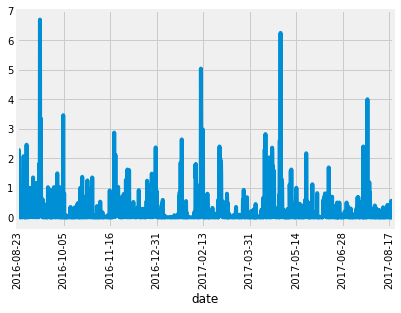

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data

# plt.bar(last12mo_df.index.values, last12mo_df['prcp'])
# plt.show()

df = last12mo_df['prcp']
df.plot(rot=90)
plt.show()

#Also ask about tick marks for bar graph lining up correctly

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary = last12mo_df[['prcp']].describe()
prcp_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
total_stations = len(station_df)
total_stations

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
grouped_station_data = measurement_df.groupby('station').count().sort_values('id', ascending=False)
grouped_station_data['activity']=grouped_station_data['id']
station_activity_df = grouped_station_data.drop(columns = ['id','date','prcp','tobs'])
station_activity_df

,activity
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [15]:
max_activity = station_activity_df.index[station_activity_df['activity'] == 2772].tolist()[0]
max_activity

'USC00519281'

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station_df = measurement_df[measurement_df['station'] == max_activity]
lowest_temp = active_station_df['tobs'].min()
highest_temp = active_station_df['tobs'].max()
avg_temp = active_station_df['tobs'].mean()
print(lowest_temp)
print(highest_temp)
print(avg_temp)

54.0
85.0
71.66378066378067


In [17]:
# Choose the station with the highest number of temperature observations.
tdate2 = active_station_df['date'].max()
tdate1 = tdate2.replace('7','6')

print(tdate1)
print(tdate2)

sql_dates = " SELECT * FROM measurement WHERE date BETWEEN '2016-08-18' AND '2017-08-18' "
temp_last12mo_df = pd.read_sql(sql_dates, con = conn)
temp_last12mo_df.head()

2016-08-18
2017-08-18


,id,station,date,prcp,tobs
0,2359,USC00519397,2016-08-18,0.00,80.0
1,2360,USC00519397,2016-08-19,0.04,77.0
2,2361,USC00519397,2016-08-20,0.00,80.0
3,2362,USC00519397,2016-08-21,0.12,76.0
4,2363,USC00519397,2016-08-22,0.40,77.0


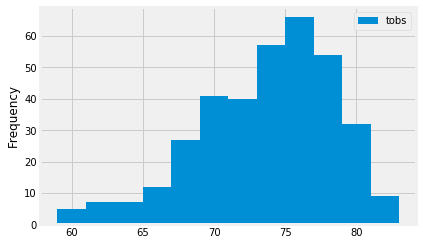

In [18]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = temp_last12mo_df[temp_last12mo_df['station'] == max_activity]
temp_data2 = temp_data.set_index('date').sort_index()
temp_data3 = temp_data2[['tobs']]

temp_data3.plot(kind='hist', bins=12)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
session = 

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

SyntaxError: invalid syntax (<ipython-input-19-4e1067466083>, line 3)

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# Plot the daily normals as an area plot with `stacked=False`